## Importing libraries and define constants

In [1]:
import numpy as np
import matplotlib.pyplot as plt

MAX_ITER = int(1e4)

## Functions definition

In [2]:
def compute_energy(number_set, partition, A=1):
    """
    Cost function following Ising formulation of the energy
    
    :number_set: Set of numbers to partition
    :partition: =+1,-1 Set of Ising spin variables associated to the number in n    
    :A: Positive constant, typically set to 1
    :return: Energy of the system
    """
    return A*(np.sum(number_set*partition))**2


def test_metropolis_crit(number_set, current_partition, candidate_partition, temperature):
    """
    Function computing the metropolis criterion,
    that compares cost function at the current and the candidate points
    receives partitions as input
    
    :number_set: Set of numbers to partition
    :current_partition: Current point(partition) to compare
    :candidate_partition: Candidate point(partition) to compare
    :return: True if the candidate is accepted, False if rejected
    """
    current_energy = compute_energy(number_set, current_partition)
    candidate_energy = compute_energy(number_set, candidate_partition)
    metropolis_crit = np.exp(-(candidate_energy-current_energy)/temperature)
    acceptance_probability = np.random.uniform()
    if (acceptance_probability < metropolis_crit):
        return True
    return False


def get_temperature(temperature_init, iteration, cooling_scheme='T0/(1+t)', K = 0.01):
    """
    Function defining the temperature cooling scheme
    
    :temperature_init: Current temperature
    :K: Time scaling coefficient
    :iteration: Current time step
    :cooling_scheme: Temperature behaviour in time
    :return: New temperature
    """
    if cooling_scheme == 'T0/(1+t)':
        temperature_new = temperature_init/(K*iteration + 1)
    elif cooling_scheme == 'T0/sqrt(1+t)':
        temperature_new = temperature_init/np.sqrt(K*iteration + 1)
    else:        
        temperature_new = temperature_init/(K*iteration + 1)
    return temperature_new


def init_random_candidate(set_size):
    """
    Find a random candidate partition to initalize the Ising spins (partitions)
    Done by randomly selecting a possible partition
    
    :set_size: length of the number set
    :return: Candidate partition (random)
    """
    random_0_1 = np.random.randint(low=0, high=2, size=set_size)
    random_candidate_partition = 2*random_0_1-np.ones(set_size, dtype='I')
    return random_candidate_partition


def find_candidate(current_partition):
    """
    Find a new candidate partition to update the current one
    Done by randomly switching the spin of one number in the total set
    
    :current_partition: Current partition
    :return: Candidate partition
    """
    index_switch = np.random.randint(low=0, high=len(current_partition))
    candidate_partition = current_partition.copy()
    candidate_partition[index_switch] *= -1
    return candidate_partition


def record_energy(energy, energy_list=None):
    """
    Record the energy in a list, if the list doesn't exist, creates one
    
    :energy: Energy of the system to record
    :energy_list: List of the energies in each cycles
    """
    if energy_list is None:
        energy_list = []
    energy_list.append(energy)
    

def simulate_loop_annealing(number_set, max_iter, temperature_init, cooling_scheme, K, current_partition, energy_list):
    """
    Performs one annealing loop
    Allows us to repeat the annealing process in cycles by restarting at initial temperature
    
    :number_set: Set of number to partition
    :max_iter: Maximum number of iterations
    :temperature_init: Initial temperature
    :cooling_scheme: Temperature behaviour in time
    :K: Time scaling coefficient
    :current_partition: Current partition
    :energy_list: List of the recorded energies
    :return: Final partition
    """
    for i in range(max_iter):
        temperature = get_temperature(temperature_init, i, 'T0/(1+t)', K)
        candidate_partition = find_candidate(current_partition)
        candidate_energy = compute_energy(number_set, candidate_partition)
        current_energy = compute_energy(number_set, current_partition)
        if (candidate_energy < current_energy):
            current_partition = candidate_partition
        elif test_metropolis_crit(number_set, current_partition, candidate_partition, temperature):
            current_partition = candidate_partition
        record_energy(compute_energy(number_set, current_partition), energy_list)
        if compute_energy(number_set, current_partition) == 0:
            return current_partition
    return current_partition

## Algorithm

In [3]:
temperature_init = 1000
k = 0.01
cooling_scheme = 'T0/(1+t)'
#number_set = [6, 5, 4, 7, 8]
number_set = list(np.random.randint(low = 1,high=100,size=50))

current_partition = init_random_candidate(len(number_set))
energy_list = []
record_energy(compute_energy(number_set, current_partition), energy_list)

current_partition = simulate_loop_annealing(number_set, MAX_ITER, temperature_init, cooling_scheme, k, current_partition, energy_list)

9


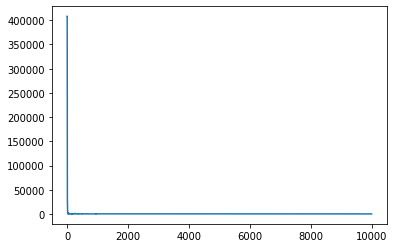

In [4]:
print(energy_list[-1])
plt.plot(range(len(energy_list)), energy_list)
plt.show()

In [ ]:
n_repeat = 30
cooling_scheme = 'T0/(1+t)'
convergence_step = list(np.zeros(n_repeat))
convergence_energy = list(np.zeros(n_repeat))
k_values = np.logspace(-5, 1, 30)
k_step_list = []
k_energy_list = []
for k in k_values:
    for j in range(n_repeat):
        number_set = list(np.random.randint(low = 1,high=20,size=50))
        current_partition = init_random_candidate(len(number_set))
        energy_list = []
        record_energy(compute_energy(number_set, current_partition), energy_list)
        current_partition = simulate_loop_annealing(number_set, MAX_ITER, temperature_init, cooling_scheme, k, current_partition, energy_list)
        convergence_step[j] = len(energy_list)
        convergence_energy[j] = energy_list[-1]
    k_step_list.append(np.mean(convergence_step))
    k_energy_list.append(np.mean(convergence_energy))

In [ ]:
plt.figure(figsize=(12,5))
plt.semilogx(k_values, k_energy_list)
plt.xlabel('Value of K', fontsize=13)
plt.ylabel('Final partition energy', fontsize=13)
plt.title('Mean energy for different values of K', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.semilogx(k_values, k_step_list)
plt.xlabel('Value of K', fontsize=13)
plt.ylabel('Convergence step', fontsize=13)
plt.title('Number of iterations for different values of K', fontsize=16)
plt.show()

In [ ]:
n_repeat = 50
cooling_scheme = 'T0/sqrt(1+t)'
convergence_step = list(np.zeros(n_repeat))
convergence_energy = list(np.zeros(n_repeat))
k_values = np.logspace(-3, 1, 30)
k_step_list = []
k_energy_list = []
for k in k_values:
    for j in range(n_repeat):
        number_set = list(np.random.randint(low = 1,high=20,size=50))
        current_partition = init_random_candidate(len(number_set))
        energy_list = []
        record_energy(compute_energy(number_set, current_partition), energy_list)
        current_partition = simulate_loop_annealing(number_set, MAX_ITER, temperature_init, cooling_scheme, k, current_partition, energy_list)
        convergence_step[j] = len(energy_list)
        convergence_energy[j] = energy_list[-1]
    k_step_list.append(np.mean(convergence_step))
    k_energy_list.append(np.mean(convergence_energy))

In [ ]:
plt.figure(figsize=(12,5))
plt.semilogx(k_values, k_energy_list)
plt.xlabel('Value of K', fontsize=13)
plt.ylabel('Final partition energy', fontsize=13)
plt.title('Mean energy for different values of K', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.semilogx(k_values, k_step_list)
plt.xlabel('Value of K', fontsize=13)
plt.ylabel('Convergence step', fontsize=13)
plt.title('Number of iterations for different values of K', fontsize=16)
plt.show()

In [ ]:
n_repeat = 50
k = 0.01 
cooling_scheme = 'T0/(1+t)'
convergence_step = list(np.zeros(n_repeat))
convergence_energy = list(np.zeros(n_repeat))
T_values = np.logspace(1, 4, 30)
T_step_list = []
T_energy_list = []
for T0 in T_values:
    for j in range(n_repeat):
        number_set = list(np.random.randint(low = 1,high=20,size=50))
        current_partition = init_random_candidate(len(number_set))
        energy_list = []
        record_energy(compute_energy(number_set, current_partition), energy_list)
        current_partition = simulate_loop_annealing(number_set, MAX_ITER, temperature_init, cooling_scheme, k, current_partition, energy_list)
        convergence_step[j] = len(energy_list)
        convergence_energy[j] = energy_list[-1]
    T_step_list.append(np.mean(convergence_step))
    T_energy_list.append(np.mean(convergence_energy))

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(T_values, T_energy_list)
plt.xlabel('Value of initial temperature', fontsize=13)
plt.ylabel('Final partition energy', fontsize=13)
plt.title('Mean energy for different values of T0', fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(T_values, T_step_list)
plt.xlabel('Value of initial temperature', fontsize=13)
plt.ylabel('Convergence step', fontsize=13)
plt.title('Number of iterations for different values of T0', fontsize=16)
plt.show()